In [1]:
# from sim.system_models.vehicle_systems.tire_model import TireModel
from sim.system_models.vehicle_systems.tire_model52 import TireModel
from sim.model_parameters.cars.lady_luck import LadyLuck
from sim.util.analysis.coeff_gen import CoeffSolver

import matplotlib.pyplot as plt
import matplotlib.lines as lines
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [2]:
tire_model = TireModel()
lady_luck = LadyLuck()
# tire_model.lat_coeffs = lady_luck.rear_tire_coeff_Fy
# tire_model.long_coeffs = lady_luck.rear_tire_coeff_Fx

tire_model.pure_lat_coeffs = [1 for x in range(18)]
tire_model.scaling_coeffs = [1 for x in range(28)]

slip_ratios = np.linspace(-0.1, 0.1, 31)
slip_angles = np.linspace(-10 * np.pi / 180, 10 * np.pi / 180, 31)
normal_loads = np.array([1000])
colors = np.array(["r", "g", "b"])

SR_dict = dict()
SA_dict = dict()

for slip_ratio in slip_ratios:
    SR_dict[slip_ratio] = []

for slip_angle in slip_angles:
    SA_dict[slip_angle] = []

c:\Users\rober\Documents\GitHub\simulation-2024\sim\system_models\vehicle_systems\tire_model52.py:60: RuntimeWarning: invalid value encountered in divide
  B_y = K_y / (C_y * D_y)
C:\Users\rober\AppData\Local\Temp\ipykernel_4872\2832798830.py:22: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  ax.plot_surface(X, Y, W1)
C:\Users\rober\AppData\Local\Temp\ipykernel_4872\2832798830.py:23: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  ax.plot_surface(X, Y, W2)


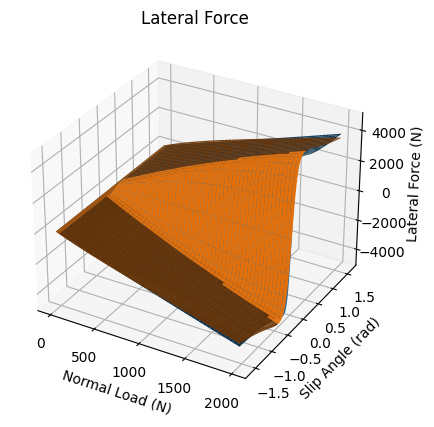

In [3]:
tire_model.pure_lat_coeffs = [1.462644363336092, -2.4525488894188525, 0.07875259157828247, 11.665598056159695, -0.0007085356603566561, -0.0003936037282383536, 78.65359240952695, -7842.704918479082, 56.50858901077719, 2.42841666180457, 0.6581244608544692, 0.00016212560860950413, -0.0010386186529656692, -0.07982161655436235, -0.0037501542948406765, 0.02152965494317117, -0.7891081372943167, -1.1113888934215281]

model_x_data = np.linspace(0, 2000, 1000)
model_y_data = np.linspace(-np.pi / 2, np.pi / 2, 1000)

X, Y = np.meshgrid(model_x_data, model_y_data)

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)

W1 = tire_model._pure_lat([1000, X, Y, 0])

tire_model.pure_lat_coeffs = [1.7791974297995208, -2.7554550026460842, 0.291446014450881, 18.442722786396143, 0.7436917209349971, -0.1512736927867483, -0.012433806706324184, 2.275436897671522, 37.75236004270436, 1.6336291003106214, 2.1422757243903536, -0.002302428834640245, -0.0008144787883109295, -0.10075907234434626, 0.02485684129631675, -0.019656047825497014, -0.6967328637382006, -2.7958587994079833]

# tire_model.scaling_coeffs[8:15] = [0.35782268129869294, 5.366223444769336e-08, 1.2900636315918423, 0.044056409984216366, -0.6534923713520951, -0.6337736507776203, 0.6154937303784241]

W2 = tire_model._pure_lat([1000, X, Y, 0])

ax = plt.axes(projection='3d')

fig.add_axes(ax)
ax.plot_surface(X, Y, W1)
ax.plot_surface(X, Y, W2)

ax.set_xlabel('Normal Load (N)')
ax.set_ylabel('Slip Angle (rad)')
ax.set_zlabel('Lateral Force (N)')
ax.set_title('Lateral Force')

plt.show()

c:\Users\rober\Documents\GitHub\simulation-2024\sim\system_models\vehicle_systems\tire_model52.py:30: RuntimeWarning: invalid value encountered in divide
  B_x = K_x / (C_x * D_x)
C:\Users\rober\AppData\Local\Temp\ipykernel_4872\2875921321.py:16: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  ax.plot_surface(X, Y, W)


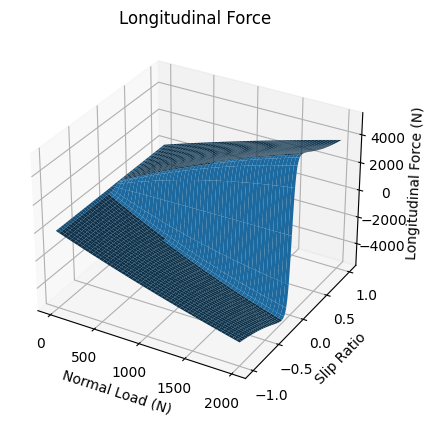

In [4]:
tire_model.pure_long_coeffs = [1.7522465581415032, -3.0543141420289697, 0.3615401388276578, 0.0, 0.6893889814926916, -0.005537730182135393, 0.012739965935907486, 0.00627354178712224, 64.84540366507208, 0.0007919860986186593, -0.28559075010725293, 0.001349213974115627, -0.00043721353267875233, -0.05807363023474984, 0.037410219013107086]

model_x_data = np.linspace(0, 2000, 1000)
model_y_data = np.linspace(-1, 1, 1000)

X, Y = np.meshgrid(model_x_data, model_y_data)

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)

W = tire_model._pure_long([1000, X, Y, 0])

ax = plt.axes(projection='3d')

fig.add_axes(ax)
ax.plot_surface(X, Y, W)

ax.set_xlabel('Normal Load (N)')
ax.set_ylabel('Slip Ratio')
ax.set_zlabel('Longitudinal Force (N)')
ax.set_title('Longitudinal Force')

plt.show()

In [5]:
pure_aligning_coeffs = [-10.721994102608898, -2.831802111313671, -2.2203942022108185, 12.159148484183673, -58.76104013270338, 61442.25201423807, 3345.651148423848, 1.2271536808563654, 0.16129752845879253] + [0 for x in range(16)]

tire_model.pure_aligning_coeffs = pure_aligning_coeffs

solver = CoeffSolver(lady_luck)
solver.temp("./data/tires/Hoosier_16x7.5-10_R20_7_cornering_original.csv")

residuals = solver.temp2(pure_aligning_coeffs)
plt.scatter([x for x in range(len(residuals))], residuals, s = 1)

print(sum(abs(np.array(residuals))))

model_x_data = np.linspace(200, 1200, 1000)
model_y_data = np.linspace(-45 * np.pi / 180, 45 * np.pi / 180, 1000)

X, Y = np.meshgrid(model_x_data, model_y_data)

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)

W = tire_model._pure_aligning([8 * 0.0254, 1000, X, Y, 0])

ax = plt.axes(projection='3d')

fig.add_axes(ax)
ax.plot_surface(X, Y, W)

ax.set_xlabel('Normal Load (N)')
ax.set_ylabel('Slip Angle (rad)')
ax.set_zlabel('Aligning Moment (Nm)')
ax.set_title('Aligning Moment')

plt.show()

print(solver._aligning_residual_calc(pure_aligning_coeffs))

AttributeError: 'CoeffSolver' object has no attribute 'temp'

In [ ]:
inclination_angle = 0

outputs = []
for load in normal_loads:
    for slip_angle in slip_angles:
        for slip_ratio in slip_ratios:
            comstock_output = tire_model.get_comstock_forces(SA = slip_angle, SR = slip_ratio, FZ = load, IA = inclination_angle * np.pi / 180)
            SR_dict[slip_ratio].append([comstock_output[0] / load, comstock_output[1] / load])
            SA_dict[slip_angle].append([comstock_output[0] / load, comstock_output[1] / load])

AttributeError: 'TireModel' object has no attribute 'get_comstock_forces'

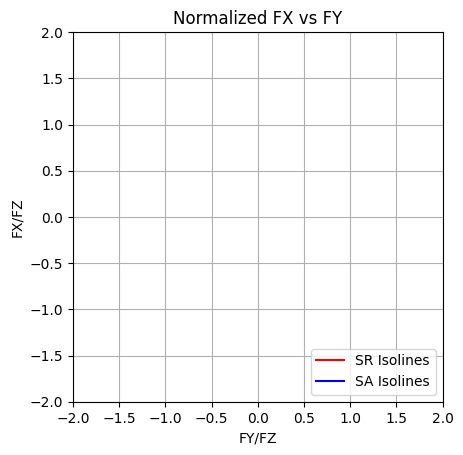

In [ ]:
for slip_ratio in SR_dict:
    forces = [[], []]
    slip = slip_ratio
    for force in SR_dict[slip_ratio]:
        forces[0].append(force[0])
        forces[1].append(force[1])
    
    plt.plot(forces[1], forces[0], 'r')
    
for slip_angle in SA_dict:
    forces = [[], []]
    slip = slip_angle
    for force in SA_dict[slip_angle]:
        forces[0].append(force[0])
        forces[1].append(force[1])
    
    plt.plot(forces[1], forces[0], 'b')
    
plt.xlabel("FY/FZ")
plt.ylabel("FX/FZ")
plt.title("Normalized FX vs FY")
plt.xlim(-2, 2)
plt.ylim(-2, 2)
SR_line = lines.Line2D([0], [0], color='red', label='SR Isolines')
SA_line = lines.Line2D([0], [0], color='blue', label='SA Isolines')
plt.legend(handles=[SR_line, SA_line], loc = 4)
plt.gca().set_aspect("equal")
plt.grid()
plt.show()

In [ ]:
# Setup

model_SA_data = np.linspace(-np.pi / 2, np.pi / 2, 1000)
model_SR_data = np.linspace(-1, 1, 1000)

SA, SR = np.meshgrid(model_SA_data, model_SR_data)

FX = tire_model.get_comstock_forces(SA, SR, 700, 0)[0]
FY = tire_model.get_comstock_forces(SA, SR, 700, 0)[1]

# FX2 = tire_model._get_comstock_forces(SA, SR, 500, 0 * np.pi / 180)[0]
# FY2 = tire_model._get_comstock_forces(SA, SR, 500, 0 * np.pi / 180)[1]

# FX3 = tire_model._get_comstock_forces(SA, SR, 500, -5 * np.pi / 180)[0]
# FY3 = tire_model._get_comstock_forces(SA, SR, 500, -5 * np.pi / 180)[1]

AttributeError: 'TireModel' object has no attribute 'get_comstock_forces'

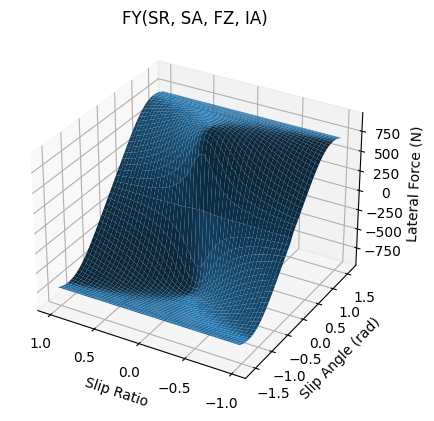

In [ ]:
# Lat

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)

ax = plt.axes(projection='3d')

fig.add_axes(ax)
ax.plot_surface(SR, SA, FY)
# ax.plot_surface(SR, SA, FY2)
# ax.plot_surface(SR, SA, FY3)

ax.set_xlabel('Slip Ratio')
ax.set_ylabel('Slip Angle (rad)')
ax.set_zlabel('Lateral Force (N)')
ax.set_title('FY(SR, SA, FZ, IA)')

ax.invert_xaxis()

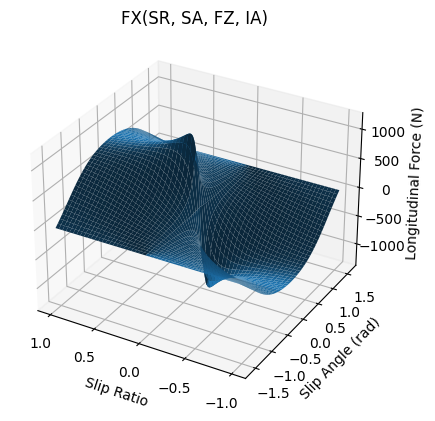

In [ ]:
# Long

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)

ax = plt.axes(projection='3d')

fig.add_axes(ax)
ax.plot_surface(SR, SA, FX)
# ax.plot_surface(SR, SA, FX2)

ax.set_xlabel('Slip Ratio')
ax.set_ylabel('Slip Angle (rad)')
ax.set_zlabel('Longitudinal Force (N)')
ax.set_title('FX(SR, SA, FZ, IA)')
ax.invert_xaxis()

In [ ]:
SA = 90
SR = 0

forces = tire_model.get_comstock_forces(SA * 180 / np.pi, SR / 100, 647.316, 0, max_force = 1000000)

print(f"FX: {round(forces[0])}, FY: {round(forces[1])}")

FX: 0, FY: 1478
